In [5]:
import pathlib
import numpy as np
import cv2 as cv


path=str(pathlib.Path().resolve())+"/imagenes/"

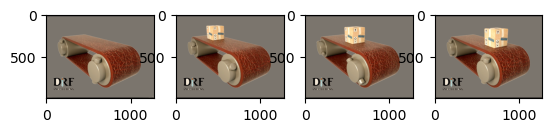

In [11]:
from matplotlib import pyplot as plt


src1 = cv.imread(path+"banda_vacia.png")
src1 = cv.cvtColor(src1,cv.COLOR_BGR2RGB)
src2 = cv.imread(path+"banda_caja1.png")
src2 = cv.cvtColor(src2,cv.COLOR_BGR2RGB)
src3 = cv.imread(path+"banda_caja1_5.png")
src3 = cv.cvtColor(src3,cv.COLOR_BGR2RGB)
src4 = cv.imread(path+"banda_caja2.png")
src4 = cv.cvtColor(src4,cv.COLOR_BGR2RGB)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4)

ax1.imshow(src1)
ax2.imshow(src2)
ax3.imshow(src3)
ax4.imshow(src4)

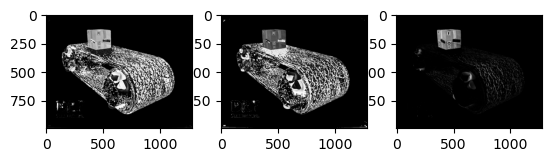

In [19]:
from typing import ChainMap


img1 = cv.cvtColor(src1,cv.COLOR_RGB2GRAY)
img2 = cv.cvtColor(src2,cv.COLOR_RGB2GRAY)

fig,(ax1,ax2,ax3) = plt.subplots(1,3)

r1 = img1-img2
r2 = img2-img1

# ESTO INTENTA EVITAR QUE NOS PASEMOS PERO A LO BRUTO
r3 = cv.subtract(img2,img1)

ax1.imshow(r1,cmap="gray")
ax2.imshow(r2,cmap="gray")
ax3.imshow(r3,cmap="gray")

In [ ]:
from typing import ChainMap


img1 = cv.cvtColor(src2,cv.COLOR_RGB2GRAY)
img2 = cv.cvtColor(src4,cv.COLOR_RGB2GRAY)

fig,(ax1,ax2,ax3) = plt.subplots(1,3)

r1 = img1-img2
r2 = img2-img1

# ESTO INTENTA EVITAR QUE NOS PASEMOS PERO A LO BRUTO
r3 = cv.subtract(img2,img1)

ax1.imshow(r1,cmap="gray")
ax2.imshow(r2,cmap="gray")
ax3.imshow(r3,cmap="gray")